In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

#from astroquery.esasky import ESASky
#from astroquery.utils import TableList
from astropy.wcs import wcs
#from reproject import reproject_interp


%matplotlib inline

from astropy.visualization import quantity_support

import pylab as pl

data.conf.remote_timeout = 60
import vapeplot
#vapeplot.set_palette('jazzcup')


from pvextractor import extract_pv_slice, Path
from astroquery.esasky import ESASky
from astroquery.utils import TableList

from reproject import reproject_interp

import beambar as bb
from astropy.coordinates import SkyCoord


In [2]:
loc = 'data/'
name= 'pbcorr_J1059_09_HI.image'
ext = '.fits'
mom0 = '_mom0'
mom1 = '_mom1'
image = ''
fullname = loc+name
imagename = fullname+ext
hdu_list = fits.open(loc+name+mom0+image+ext)
hdu_list.info()
hdu1_list = fits.open(loc+name+mom1+image+ext)
hdu1_list.info()
hdu_list2 = fits.open(imagename)
hdu_list2.info()

Filename: data/pbcorr_J1059_09_HI.image_mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
Filename: data/pbcorr_J1059_09_HI.image_mom1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
Filename: data/pbcorr_J1059_09_HI.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     633   (2048, 2048, 189)   float32   


In [3]:
cube = SpectralCube.read(hdu_list2)
data_mom1 = fits.getdata(loc+name+mom1+image+ext)
header_mom1 = fits.getheader( loc+name+mom1+image+ext)
data_mom0 = fits.getdata(loc+name+mom0+image+ext)
header_mom0 = fits.getheader(loc+name+mom0+image+ext)
print(type(data_mom0))
print(data_mom0.shape)
print(type(data_mom1))
print(data_mom1.shape)
ww = wcs.WCS(header_mom0)

<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(2048, 2048)


In [23]:
rob15_mom0 = fits.getdata(loc+'rob15_J1059_09_HI.image_mom0'+ext)
rob15_header = fits.getheader(loc+'rob15_J1059_09_HI.image_mom0'+ext)

rob1_mom0 = fits.getdata(loc+'rob1_J1059_09_HI.image_mom0'+ext)
rob1_header = fits.getheader(loc+'rob1_J1059_09_HI.image_mom0'+ext)

rob05_mom0 = fits.getdata(loc+'rob05_J1059_09_HI.image_mom0'+ext)
rob05_header = fits.getheader(loc+'rob05_J1059_09_HI.image_mom0'+ext)

rob0_mom0 = fits.getdata(loc+'rob0_J1059_09_HI.image_mom0'+ext)
rob0_header = fits.getheader(loc+'rob0_J1059_09_HI.image_mom0'+ext)

robmin2_mom0 = fits.getdata(loc+'robmin2_J1059_09_HI.image_mom0'+ext)
robmin2_header = fits.getheader(loc+'robmin2_J1059_09_HI.image_mom0'+ext)

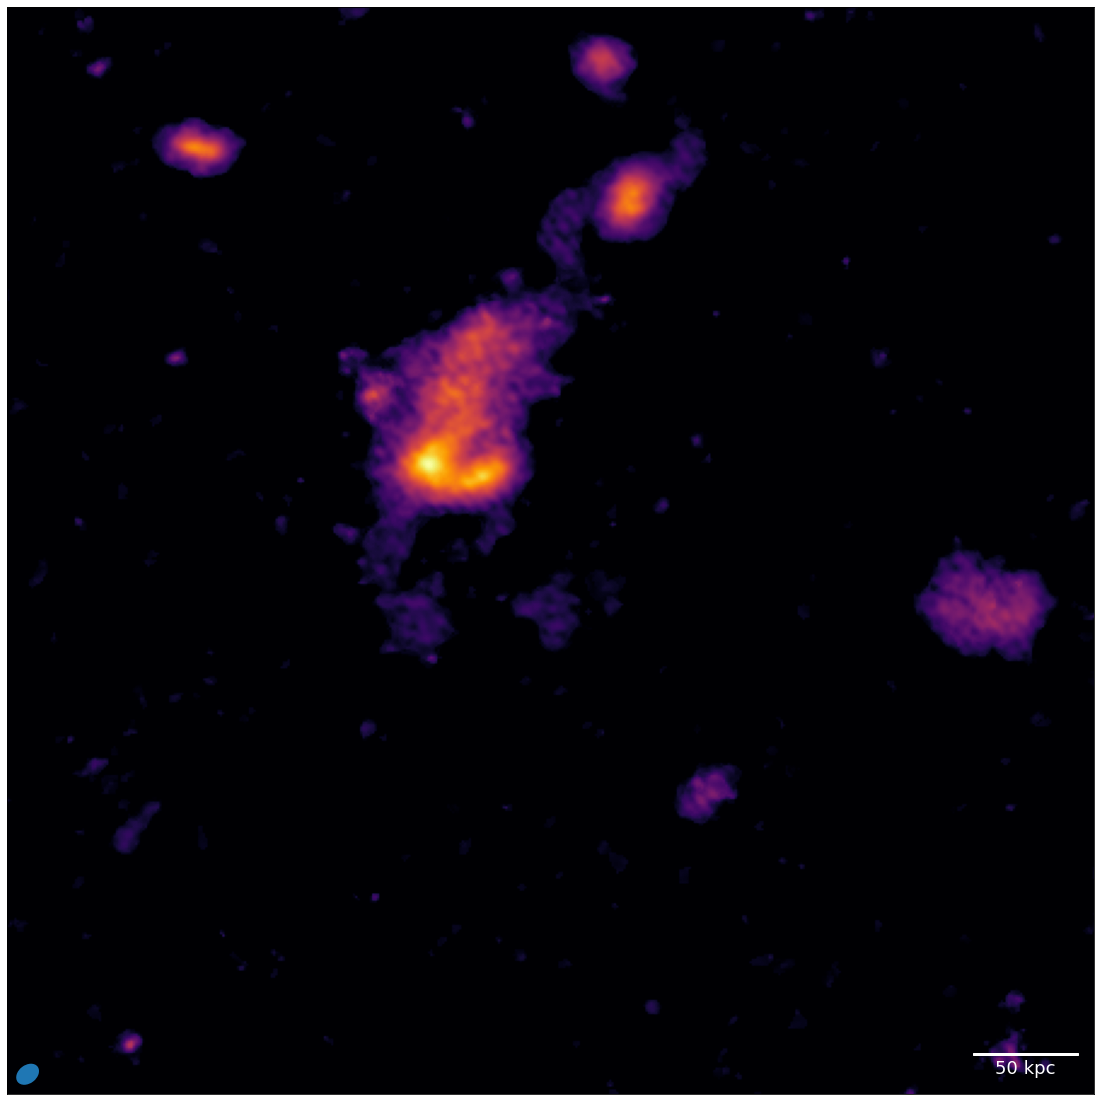

In [57]:
sweet = data_mom0[730:1180,836:1286]
sweet_copy = np.copy(sweet)


fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= wcs.WCS(header_mom0))
im = ax.imshow(np.abs(sweet_copy)**0.7, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = header_mom0)
add_scalebar(ax,0.02412932218197389, label = '50 kpc',fsize = 18)



lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('07mom0.pdf', bbox_inches='tight')

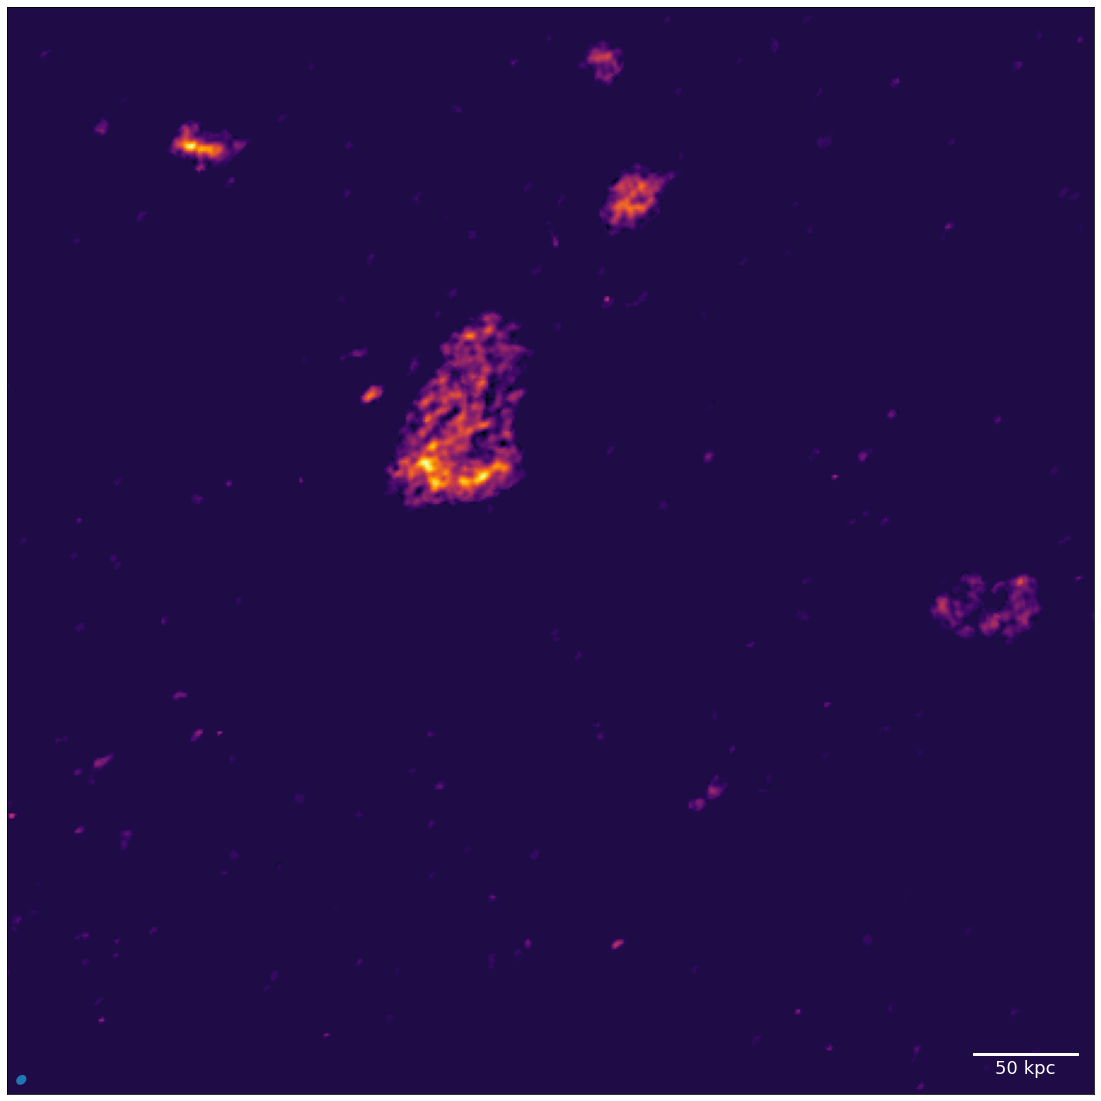

In [51]:
sweet = robmin2_mom0[730:1180,836:1286]
sweet_copy = np.copy(sweet)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= wcs.WCS(robmin2_header))
im = ax.imshow(sweet_copy, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = robmin2_header)
add_scalebar(ax,0.02412932218197389, label = '50 kpc',fsize = 18)



lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('min2mom0.pdf', bbox_inches='tight')

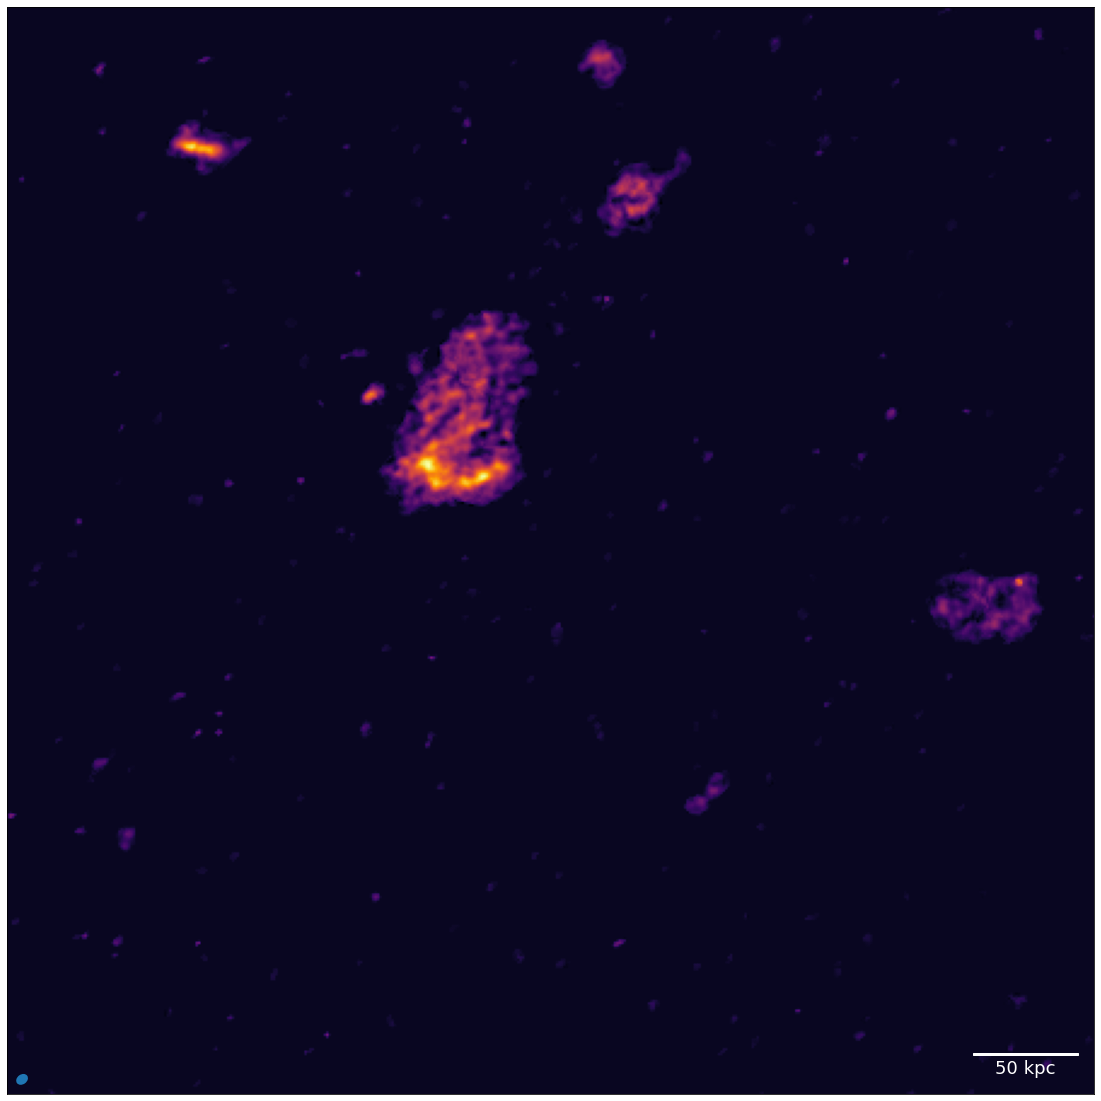

In [50]:
sweet = rob0_mom0[730:1180,836:1286]
sweet_copy = np.copy(sweet)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= wcs.WCS(rob0_header))
im = ax.imshow(sweet_copy, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = rob0_header)
add_scalebar(ax,0.02412932218197389, label = '50 kpc',fsize = 18)



lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('0mom0.pdf', bbox_inches='tight')

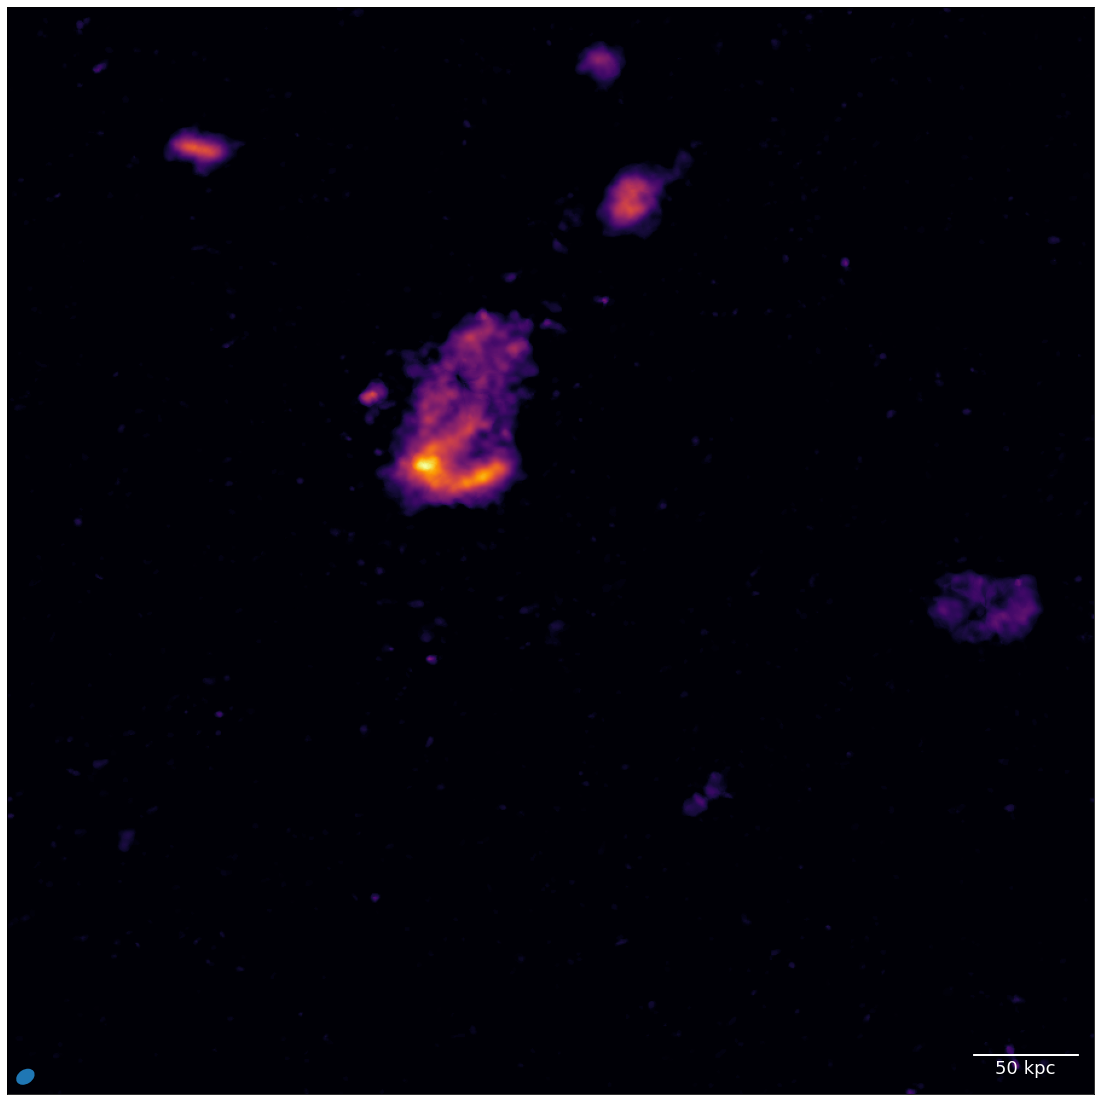

In [59]:
sweet = rob05_mom0[730*2:1180*2,836*2:1286*2]
sweet_copy = np.copy(sweet)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= wcs.WCS(rob05_header))
im = ax.imshow(sweet_copy, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = rob05_header)
add_scalebar(ax,0.02412932218197389, label = '50 kpc',fsize = 18)



lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('05mom0.pdf', bbox_inches='tight')

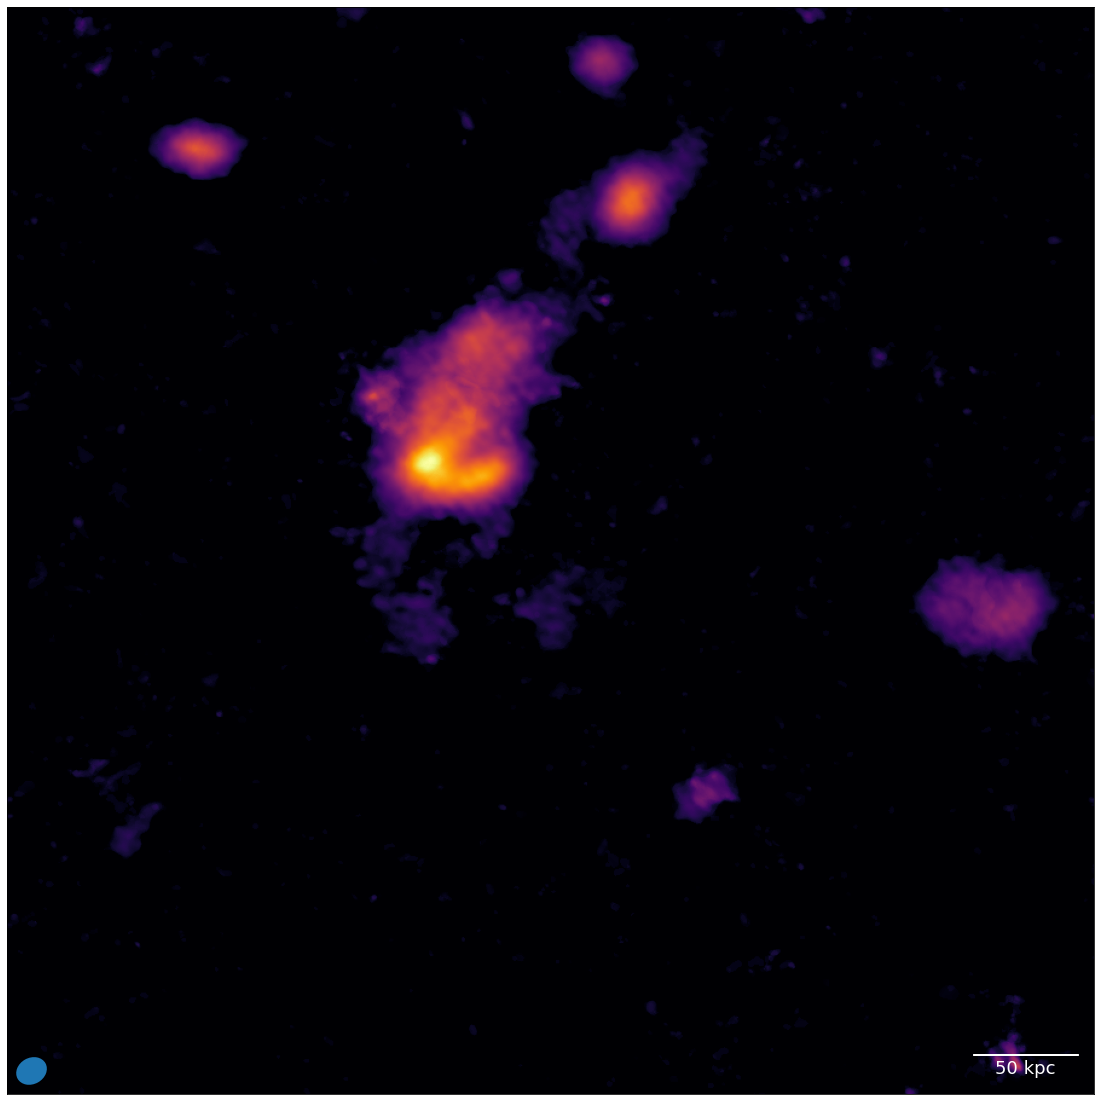

In [60]:
sweet = rob1_mom0[730*2:1180*2,836*2:1286*2]
sweet_copy = np.copy(sweet)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= wcs.WCS(rob1_header))
im = ax.imshow(np.abs(sweet_copy)**0.7, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = rob1_header)
add_scalebar(ax,0.02412932218197389, label = '50 kpc',fsize = 18)



lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('1mom0.pdf', bbox_inches='tight')

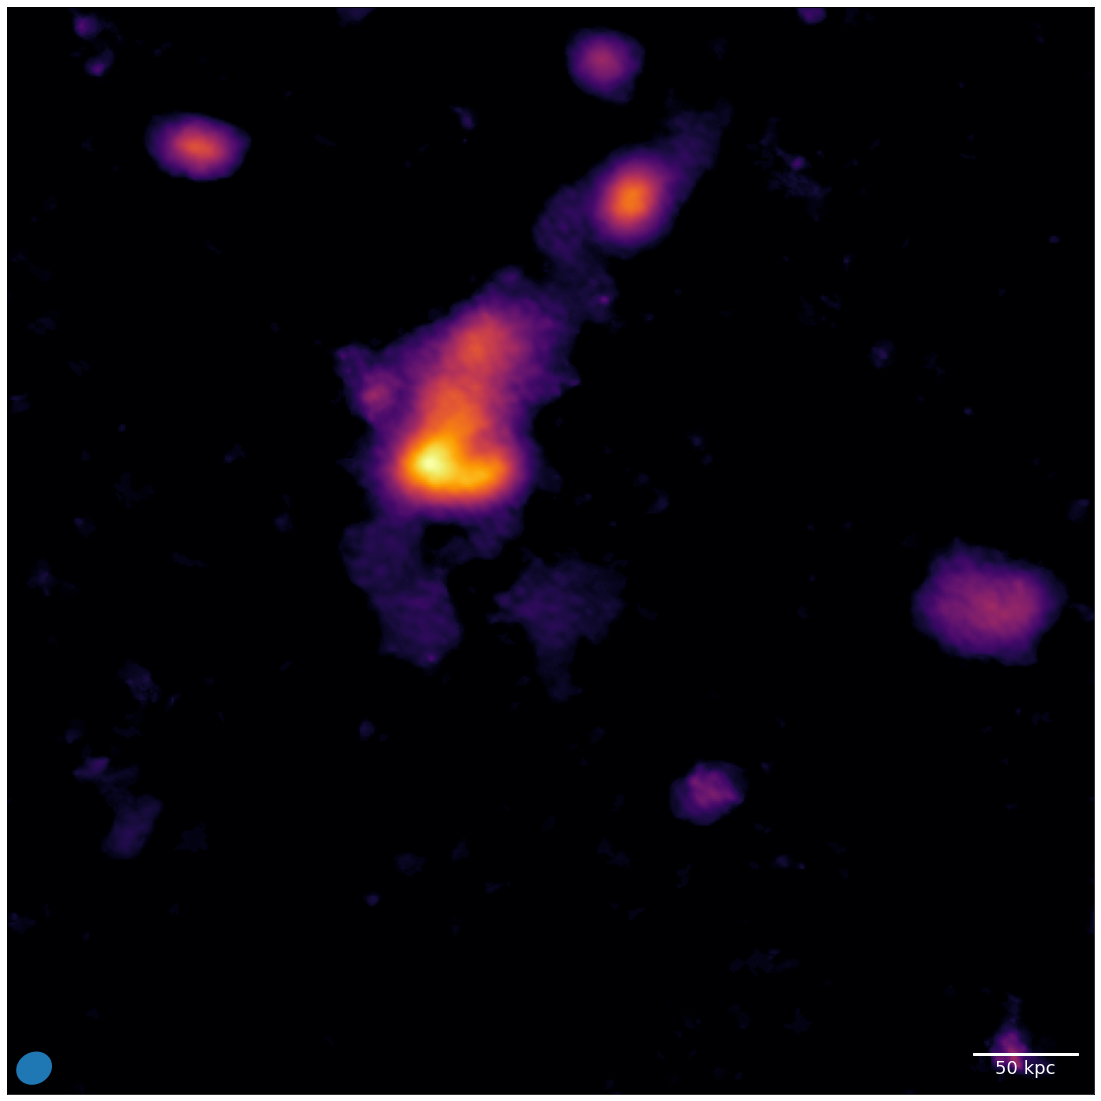

In [61]:
sweet = rob15_mom0[730:1180,836:1286]
sweet_copy = np.copy(sweet)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= wcs.WCS(rob15_header))
im = ax.imshow(np.abs(sweet_copy)**0.7, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = rob15_header)
add_scalebar(ax,0.02412932218197389, label = '50 kpc',fsize = 18)



lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('15mom0.pdf', bbox_inches='tight')